# Brain-Machine Interface Spike Sorting with PCA

### EE 16B: Designing Information Devices and Systems II, Adapted from Original SVD Lab 

## Table of Contents
* [Task 1: Two Neuron Spike Sorting](#task1)
* [Task 2: Three Neuron Spike Sorting](#task2)
* [Task 3: Determining Neurons](#task3)

## Task 1: Two Neuron Spike Sorting 

## Part a)

In [34]:
%matplotlib inline
# %matplotlib notebook
import numpy as np
import scipy.io
import scipy.cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
presorted = {k: v for k, v in scipy.io.loadmat('spike_waveforms').items() \
             if k in ('sig118a_wf', 'sig118b_wf', 'sig118c_wf')}
presorted = [presorted['sig118a_wf'], presorted['sig118b_wf'], presorted['sig118c_wf']]

In [35]:
def get_train_set(data):
    """ Separate data set into 2 sets. 
    1/6 of the dataset is training set and the rest is test set
    Parameter:
        data: waveform data (width = number of samples per spike)
    """
    n = data.shape[0]
    training_idxes = np.random.choice(n, n//6, replace=False)
    training_set = data[training_idxes]
    test_set = [data[i] for i in range(n) if n not in training_idxes]
    return training_set, test_set

# Create training and testing dataset
two_train, two_test = get_train_set(np.concatenate(presorted[1:]))
three_train, three_test = get_train_set(np.concatenate(presorted))

Text(0.5,1,'Averaged presorted 3 neuron spikes')

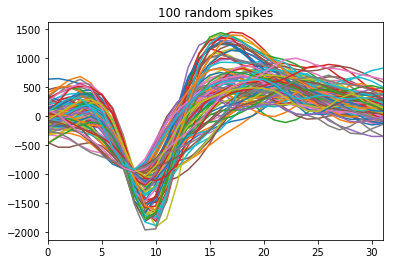

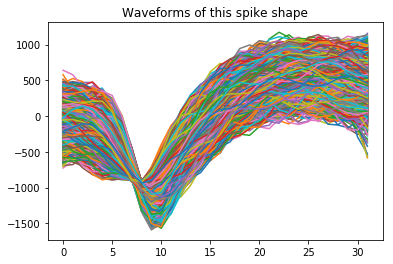

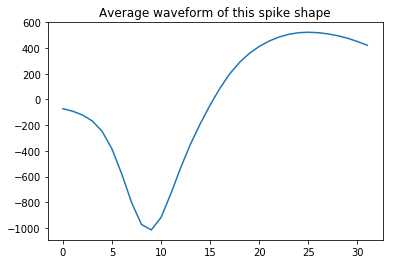

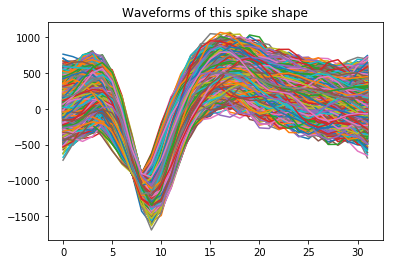

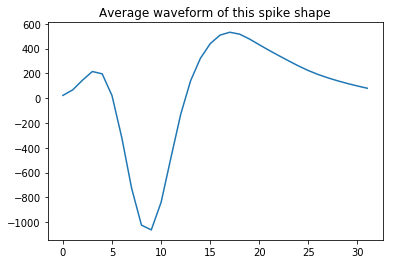

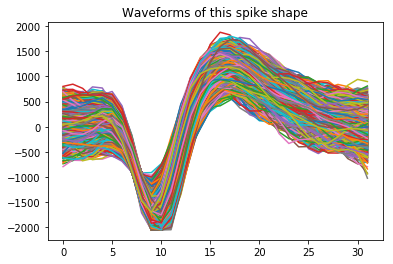

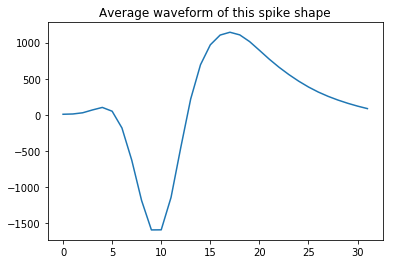

<Figure size 432x288 with 0 Axes>

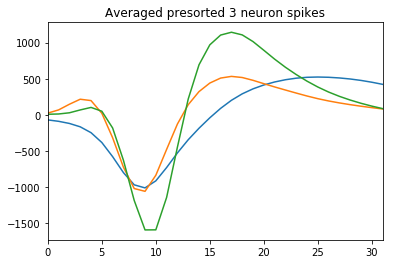

In [36]:
# Plot 100 random spikes
for waveforms in three_neurons_training[:100]:
    plt.plot(waveforms)
plt.xlim((0,31))
plt.title('100 random spikes')
plt.figure()

# Plot the 3 spike shapes based on the presorted data
for waveforms in presorted:
    plt.title("Waveforms of this spike shape")
    plt.plot(waveforms.T)
    plt.figure()
    plt.title("Average waveform of this spike shape")
    plt.plot(np.mean(waveforms, axis=0))
    plt.figure()
    
plt.figure()   
for waveforms in presorted:
    plt.plot(np.mean(waveforms, axis=0))
plt.xlim((0,31))
plt.title('Averaged presorted 3 neuron spikes')

You will be using <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html">np.linalg.svd</a> in your PCA function. Read the documentation for this function to figure out how to choose the principal components used as the basis for the lower dimensional space. (Note: in the docs, `a.H` means the congugate transpose of a).

## Part e)

In [37]:
def PCA_train(training_set, n_components):
    """ Use np.linalg.svd to perform PCA
    Parameters:
        training_set: the data set to perform PCA on (MxN)
        n_components: the dimensionality of the basis to return (i.e. number of neurons)
    Returns: 
        The n_components principal components with highest significants and 
        the mean of each column of the original data
    Hint: Subtract the mean of the data first so the average of each column is 0. The axis 
        parameter of np.mean is helpful here.
    """    
    # YOUR CODE HERE #
    mean = np.mean(training_set,axis=0)
    U, s, V = np.linalg.svd(training_set-mean) #Hint
    basis = V.T[:n_components]
    # SOLN END #
    
    return basis, mean

def PCA_project(data, new_basis, mean):
    """ Project the data set, adjusted by the mean, into the new basis vectors
    Parameters:
        data: data to project (MxN)
        new_basis: new bases (KxN)
        mean: mean of each timestamp from PCA (list of length N)
    Returns: 
        Data projected onto new_basis (MxK)
    Hint: Don't forget to adjust the data with the PCA training mean!
    """
    # YOUR CODE HERE #
    return np.dot(data - mean, new_basis.T)

## Part f)

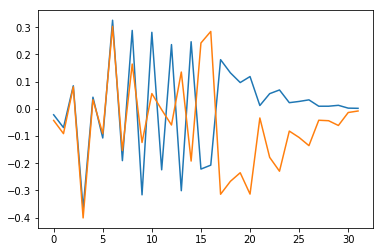

In [38]:
# Perform PCA and plot the first 2 principal components.

# YOUR CODE HERE
two_new_basis, two_mean = PCA_train(two_neurons_training, 2)
proj = PCA_project(two_train, two_new_basis, two_mean)

# Plot the basis components
for comp in two_new_basis:
    plt.plot(comp)

## Part g)

Text(0.5,1,'Presorted data')

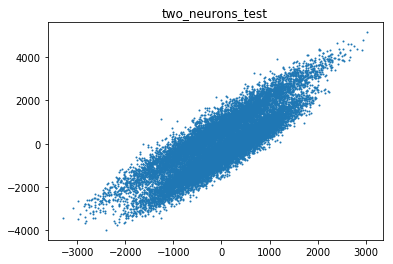

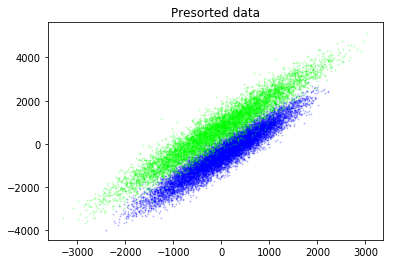

In [39]:
random_directions = np.random.randint(2, size=(2,32))

two_projected = PCA_project(two_test, random_directions, two_mean)

# Plot the projected neurons
plt.figure()
plt.scatter(*two_projected.T, s=1)
plt.title('two_neurons_test')

# Project the presorted data and plot it
plt.figure()
presorted_two_projected = [PCA_project(spikes, random_directions, two_mean) for spikes in presorted[1:]]
colors = ['#0000ff', '#00ff00']
for dat, color in zip(presorted_two_projected, colors):
    plt.scatter(*dat.T, c=color, alpha=0.2,s=1)
plt.title('Presorted data')

## Part h)

Text(0.5,1,'Presorted data')

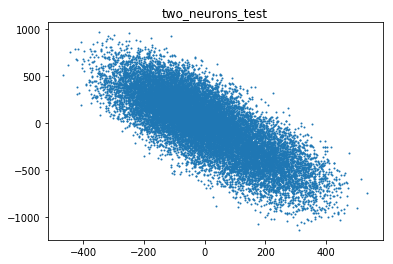

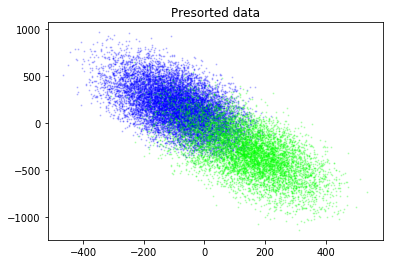

In [40]:
# Project the test data two_neurons_test to the basis you found earlier

# YOUR CODE HERE #
two_projected = PCA_project(two_test, two_new_basis, two_mean)

# Plot the projected neurons
plt.figure()
plt.scatter(*two_projected.T,s=1)
plt.title('two_neurons_test')

# Project the presorted data and plot it
plt.figure()
presorted_two_projected = [PCA_project(spikes, two_new_basis, two_mean) for spikes in presorted[1:]]
colors = ['#0000ff', '#00ff00']
for dat, color in zip(presorted_two_projected, colors):
    plt.scatter(*dat.T, c=color, s=1, alpha=0.2)
plt.title('Presorted data')

Note that the first principal component separates the two neurons in the $x$-axis. Thus, technically we only need 1 principal component to separate the two neurons. This is because the algorithm maximizes the square of the dot product of each signal with the principal component, which results in a large positive dot product with 1 neuron and a large negative dot product with the other.

## Task 2: Three Neuron Spike Sorting

## Part i)

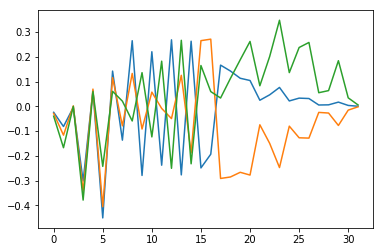

In [41]:
# Repeat training with three neuron data, producing 3 principal components

# YOUR CODE HERE
three_new_basis2, three_mean2 = PCA_train(three_train, 3)
proj = PCA_project(three_train, three_new_basis2, three_mean2)

# Plot the resulting basis
for comp in three_new_basis2:
    plt.plot(comp)

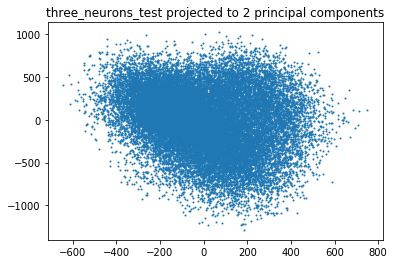

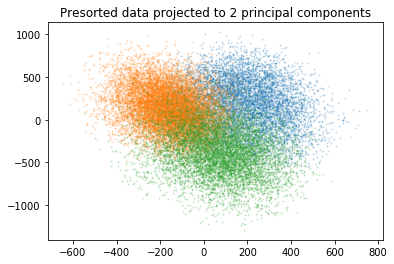

In [42]:
basis = three_new_basis2[0:2]
three_projected_2 = PCA_project(three_test, basis , three_mean2)
presorted_projected_2 = [PCA_project(spikes, basis, three_mean2) for spikes in presorted]


# Plot the resulting projection
plt.title("three_neurons_test projected to 2 principal components")
plt.scatter(three_projected_2.T[0], three_projected_2.T[1], s=1)
plt.figure()

plt.title("Presorted data projected to 2 principal components")
for p in presorted_projected_2:
    plt.scatter(p.T[0], p.T[1], s=1, alpha=0.2)

## Part j)

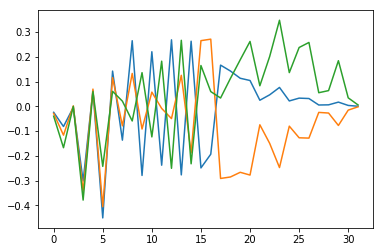

In [43]:
# Repeat training with three neuron data, producing 3 principal components

three_new_basis, three_mean = PCA_train(three_train, 3)

# Plot the resulting basis
for comp in three_new_basis:
    plt.plot(comp)

Text(0.5,0.92,'Top View: Presorted data projected to 3 principal components')

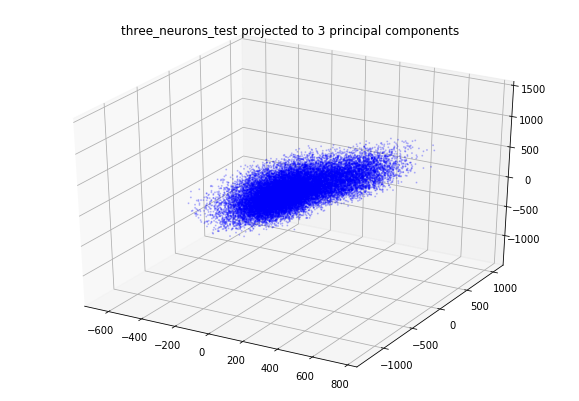

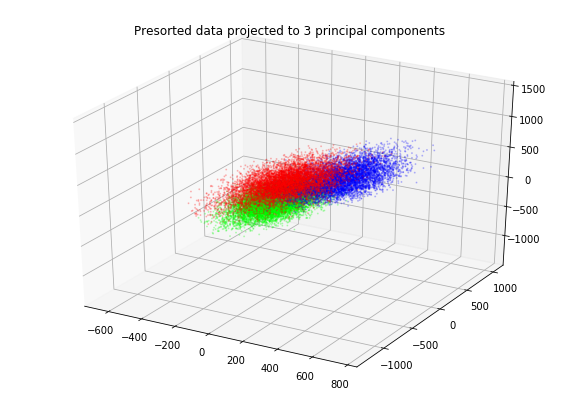

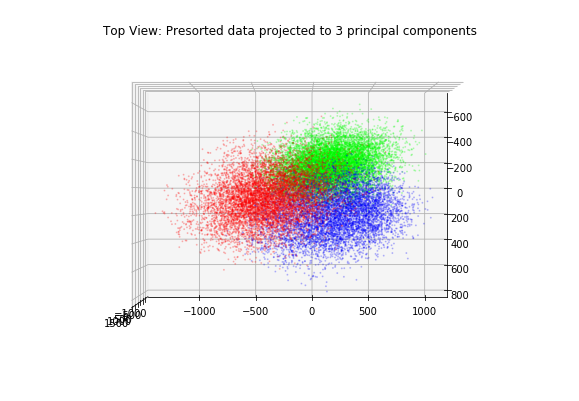

In [44]:
def plot_3D(data, view_from_top=False):
    """ Takes list of arrays (x, y, z) coordinate triples
    One array of triples per color
    """
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['#0000ff', '#00ff00', '#ff0000']
    for dat, color in zip(data, colors):
        Axes3D.scatter(ax, *dat.T, s=1, c=color, alpha=0.2)
    if view_from_top:
        ax.view_init(elev=90.,azim=0)                # Move perspective to view from top

        
# Classify the three_neurons_test data based on the basis computed above
# YOUR CODE HERE #
three_projected = PCA_project(three_test, three_new_basis, three_mean)

# Plot the resulting projection
plot_3D([three_projected], False)
plt.title('three_neurons_test projected to 3 principal components')

presorted_projected = [PCA_project(spikes, three_new_basis, three_mean) for spikes in presorted]
plot_3D(np.array(presorted_projected), False)
plt.title('Presorted data projected to 3 principal components')

plot_3D(np.array(presorted_projected), True)
plt.title('Top View: Presorted data projected to 3 principal components')



Change the second argument to the `plot_3D` function calls above to True to view the plots "from the top" (i.e. looking down the positive z axis).



## Task 3: Determining Neurons

## Part L)

In [45]:
def which_neuron(data_point, centroid1, centroid2):
    """ Determine which centroid is closest to the data point
    Inputs:
        data_point: 1x2 array containing x/y coordinates of data point
        centroid1: 1x2 array containing x/y coordinates of centroid 1
        centroid2: 1x2 array containing x/y coordinates of centroid 1
    Returns: 
        The centroid closest to the data point
    """
    
    # YOUR CODE HERE
    error = data_point - np.vstack((centroid1, centroid2))
    return np.argmin(np.linalg.norm(error, axis=1)) 

## Part m)

In [46]:
#YOUR CODE HERE
two_new_basis, two_mean = PCA_train(two_train, 2)
presorted_projected = [PCA_project(spikes, two_new_basis, two_mean) for spikes in presorted[1:]]
centroids = [np.mean(spikes, axis=0) for spikes in presorted_projected]
two_projected = np.vstack((presorted_projected[0], presorted_projected[1]))
#END YOUR CODE

num_of_firings = np.zeros(2)
two_projected = two_projected
for i in range(0,len(two_projected)):
    # YOUR CODE START
    neuron_number = which_neuron(two_projected[i], centroids[0], centroids[1])
    # END YOUR CODE
    num_of_firings[neuron_number-1] +=1
    
print('Neuron 1 Fired ' + str(num_of_firings[0]) + ' times')
print('Neuron 2 Fired ' + str(num_of_firings[1]) + ' times')

Neuron 1 Fired 7968.0 times
Neuron 2 Fired 11389.0 times


## Part n)

In [47]:
def find_centroids(clustered_data, num_of_clusters):
    """ Use scipy.cluster.vq.kmeans to determine centroids of clusters
    Parameters:
        clustered_data: the data projected onto the new basis
        num_of_clusters: the expected number of clusters in the data
    Returns: 
        The centroids of the clusters
    Hint 1: make sure to first 'whiten' the data (refer to docs)
    """
    
    return scipy.cluster.vq.kmeans(clustered_data, num_of_clusters)[0]

In [48]:
# Determine the centroids in the 2-neuron data

centroid_list = find_centroids(two_projected, 2)

# Print the centroid locations
centroid1 = centroid_list[0]
centroid2 = centroid_list[1]

print('The first centroid is at: ' + str(centroid1))
print('The second centroid is at: ' + str(centroid2))

# Determine how many times neuron1 and neuron2 fired in the two_classifed data

num_of_firings = np.zeros(2)

for i in range(0,len(two_projected)):
    # YOUR CODE START
    # SOLN START #
    neuron_number = which_neuron(two_projected[i], centroid1, centroid2)
    # SOLN END
    # END YOUR CODE
    num_of_firings[neuron_number-1] +=1  
    
# Print the results
print('Neuron 1 Fired ' + str(num_of_firings[0]) + ' times')
print('Neuron 2 Fired ' + str(num_of_firings[1]) + ' times')

print('Remember, the order of the two clusters has no meaning. Their centroids are what define them.')

The first centroid is at: [ 137.77638916 -334.40020718]
The second centroid is at: [-91.36951251 217.15702586]
Neuron 1 Fired 11408.0 times
Neuron 2 Fired 7949.0 times
Remember, the order of the two clusters has no meaning. Their centroids are what define them.
